## Project PCD Kelompok 34

# sebelum preprocessing

# Import Library untuk Pemrosesan Citra dan Machine Learning

In [1]:
import os
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.metrics import accuracy_score, classification_report
from skimage.feature import graycomatrix, graycoprops
from scipy.stats import entropy
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.metrics import (confusion_matrix, ConfusionMatrixDisplay)
import seaborn as sns
from collections import Counter

Cell ini digunakan untuk mengimpor berbagai library yang diperlukan dalam pemrosesan citra, analisis tekstur, statistik, serta penerapan algoritma  mesin learning untuk klasifikasi. Dengan library ini, dapat dilakukan segmentasi, ekstraksi fitur, evaluasi model, dan visualisasi hasil.

1. cv2 (OpenCV) digunakan untuk membaca, memproses, dan mengekstrak fitur dari citra.
2. matplotlib.pyplot memfasilitasi visualisasi data, termasuk citra dan grafik analisis.
3. numpy menyediakan operasi numerik dan array yang efisien.
4. pandas digunakan untuk manipulasi dan analisis data dalam format tabular.
5. sklearn.model_selection memungkinkan pemisahan data ke dalam set pelatihan dan pengujian serta validasi model.
6. sklearn.metrics berisi metrik evaluasi untuk mengukur performa model klasifikasi.
7. skimage.feature memiliki fungsi untuk ekstraksi fitur tekstur menggunakan matriks co-occurrence (graycomatrix) dan properti tekstur (graycoprops).
8. scipy.stats menyediakan fungsi statistik, termasuk perhitungan entropi.
9. sklearn.ensemble, sklearn.svm, sklearn.neighbors berisi berbagai algoritma pembelajaran mesin seperti Random Forest, Support Vector Machine, dan K-Nearest Neighbors.
10. seaborn memfasilitasi visualisasi data dengan grafik yang lebih informatif dan estetis.
11. collections.Counter digunakan untuk menghitung kemunculan elemen dalam suatu dataset.


# Fungsi Crop Citra ke Ukuran 1:1

In [2]:
# fungsi untuk crop citra ke ukuran 1 banding 1
def crop_to_1by1(citra_input):
    tinggi, panjang = citra_input.shape[:2]

    if(panjang == tinggi):
        print(f"{tinggi} == {panjang}\n tidak perlu crop ke 1:1")
        return citra_input

    if panjang < tinggi:
        terpendek = panjang
    elif panjang > tinggi:
        terpendek = tinggi

    hasil = np.zeros((terpendek, terpendek), dtype=citra_input.dtype)

    if panjang > tinggi:
        offset = (panjang - terpendek) // 2
        for i in range(terpendek):
            for j in range(terpendek):
                hasil[i, j] = citra_input[i, j + offset]
    else:
        offset = (tinggi - terpendek) // 2
        for i in range(terpendek):
            for j in range(terpendek):
                hasil[i, j] = citra_input[i + offset, j]

    return hasil

Fungsi crop_to_1by1 digunakan untuk memastikan bahwa citra memiliki aspek rasio 1:1 dengan memotong bagian yang lebih panjang agar sesuai dengan sisi yang lebih pendek. Fungsi ini berguna dalam pemrosesan citra, terutama saat diperlukan format persegi untuk analisis lebih lanjut atau sebagai input bagi model pembelajaran mesin.

Alur Kerja

1. Fungsi menerima sebuah citra sebagai input dalam bentuk array.
2. Ukuran citra diambil dengan membaca nilai tinggi dan panjangnya.
3. Jika citra sudah memiliki aspek rasio 1:1, tidak dilakukan pemrosesan lebih lanjut, dan citra dikembalikan tanpa perubahan.
4. Jika panjang lebih besar dari tinggi, maka bagian tengah citra secara horizontal dipilih untuk dipotong.
5. Jika tinggi lebih besar dari panjang, maka bagian tengah citra secara vertikal dipilih untuk dipotong.
6. Sebuah array kosong dengan ukuran persegi dibuat untuk menyimpan hasil cropping.
7. Dengan menggunakan offset, bagian tengah dari citra asli diambil dan dimasukkan ke dalam array baru.
8. Citra yang telah dipotong dikembalikan sebagai output.

Komponen yang berperan utama dalam fungsi ini adalah np.zeros, yang digunakan untuk membuat array kosong sebagai wadah hasil cropping, serta perhitungan offset yang menentukan bagian mana dari citra asli yang dipotong agar tetap berada di tengah. Loop for digunakan untuk menyalin data dari citra asli ke citra hasil cropping. Input fungsi ini adalah citra dengan dimensi yang tidak berbentuk persegi, sedangkan outputnya adalah citra hasil cropping yang memiliki rasio 1:1 sehingga lebih mudah diolah dalam berbagai aplikasi.


# Fungsi Resize Citra agar Semua Memiliki Ukuran yang Sama

In [3]:
# fungsi untuk resize citra agar semuanya memiliki ukuran yang sama
def resize(citra_input, tinggi_baru, panjang_baru):
    tinggi, panjang = citra_input.shape[:2]
    resized_citra = np.zeros((tinggi_baru, panjang_baru), dtype=citra_input.dtype)

    y_ratio = tinggi / tinggi_baru
    x_ratio = panjang / panjang_baru

    for i in range(tinggi_baru):
        for j in range(panjang_baru):
            src_y = int(i * y_ratio)
            src_x = int(j * x_ratio)
            resized_citra[i, j] = citra_input[src_y, src_x]

    return resized_citra

Fungsi resize digunakan untuk mengubah ukuran citra agar semuanya memiliki dimensi yang seragam, yaitu sesuai dengan nilai tinggi_baru dan panjang_baru yang diberikan. Ini berguna dalam pemrosesan citra, terutama ketika dataset terdiri dari gambar dengan ukuran yang bervariasi dan perlu dinormalisasi sebelum analisis lebih lanjut atau sebagai input bagi model pembelajaran mesin.

Alur Kerja

1. Fungsi menerima citra sebagai input dalam bentuk array serta dua parameter tinggi_baru dan panjang_baru yang menentukan ukuran akhir citra.
2. Mengambil ukuran awal citra dengan membaca tinggi dan panjangnya.
3. Membuat array kosong dengan ukuran yang diinginkan menggunakan np.zeros sebagai wadah citra hasil resize.
4. Menghitung rasio perbandingan antara dimensi asli dan dimensi yang diinginkan (y_ratio dan x_ratio).
5. Iterasi dilakukan untuk mengisi array baru dengan nilai dari citra asli berdasarkan rasio perbandingan, dengan mengambil nilai piksel terdekat dari citra asli.
6. Citra hasil resize kemudian dikembalikan sebagai output.

Komponen yang berperan utama dalam fungsi ini adalah np.zeros, yang digunakan untuk membuat array kosong sebagai wadah hasil resize, serta perhitungan y_ratio dan x_ratio yang menentukan cara pengambilan piksel dari citra asli. Loop for digunakan untuk menyalin nilai piksel berdasarkan perhitungan rasio tersebut. Input fungsi ini adalah citra dengan ukuran bervariasi, sedangkan outputnya adalah citra hasil resize dengan dimensi yang telah ditentukan sehingga lebih mudah diproses dalam berbagai aplikasi.


## Data Loading

Buat struktur folder dataset sebagai berikut:
```
.
└──dataset
    ├── label1
	├── image1.jpg
	├── image2.jpg
	└── image3.jpg
    ├── label2
    └── label3
    └── dst...
```

# Proses Pembacaan dan Pra-Pemrosesan Dataset Citra

Fungsi ini digunakan untuk membaca dataset citra dari direktori yang telah ditentukan, kemudian melakukan serangkaian tahap pra-pemrosesan seperti konversi ke grayscale, cropping ke ukuran 1:1, dan resizing agar semua citra memiliki ukuran yang seragam sebelum dimasukkan ke dalam array untuk analisis lebih lanjut.

Alur Kerja

1. Membuat tiga list kosong yaitu data, labels, dan file_name untuk menyimpan citra, label, dan nama file.
2. Mengiterasi setiap sub-folder dalam direktori dataset sebagai kategori label.
3. Membaca semua file citra dalam setiap sub-folder dan menentukan path lengkapnya.
4. Menggunakan OpenCV untuk membaca citra dari path yang ditentukan.
5. Mengonversi citra menjadi format uint8 agar sesuai dengan tipe data citra standar.
6. Mengubah citra ke mode grayscale dengan cv.cvtColor(img, cv.COLOR_BGR2GRAY), sehingga hanya satu channel intensitas yang dipertahankan.
7. Memastikan bahwa citra memiliki aspek rasio 1:1 dengan memanggil fungsi crop_to_1by1().
8. Menyesuaikan ukuran citra agar menjadi 140x140 piksel menggunakan fungsi resize().
9. Menyimpan citra yang telah diproses ke dalam list data, sementara label kategori dari citra disimpan dalam labels, dan nama file dicatat dalam file_name.
10. Setelah seluruh citra dalam dataset selesai diproses, data dan labels dikonversi ke array NumPy untuk mempermudah manipulasi dan analisis lebih lanjut.

Komponen yang berperan utama dalam fungsi ini adalah OpenCV untuk membaca dan memproses citra, serta fungsi crop_to_1by1 dan resize yang memastikan konsistensi ukuran citra. Input dari proses ini adalah sekumpulan citra dalam berbagai format dan ukuran, sedangkan outputnya berupa array NumPy yang berisi citra yang telah diproses serta label kategori dari masing-masing citra untuk keperluan klasifikasi.


In [4]:
data = []
labels = []
file_name = []
for sub_folder in os.listdir("dataset\\"):
    sub_folder_files = os.listdir(os.path.join("dataset\\", sub_folder))
    for i, filename in enumerate(sub_folder_files):
        img_path = os.path.join("dataset\\", sub_folder, filename)
        img = cv.imread(img_path)
        img = img.astype(np.uint8)
        img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
        img = crop_to_1by1(img)
        img = resize(img, 140, 140)
        
        data.append(img)
        labels.append(sub_folder)
        name = os.path.splitext(filename)[0]
        file_name.append(filename)
        
data = np.array(data)
labels = np.array(labels)

600 == 600
 tidak perlu crop ke 1:1
600 == 600
 tidak perlu crop ke 1:1
225 == 225
 tidak perlu crop ke 1:1
225 == 225
 tidak perlu crop ke 1:1
225 == 225
 tidak perlu crop ke 1:1
225 == 225
 tidak perlu crop ke 1:1
225 == 225
 tidak perlu crop ke 1:1


## Data Understanding

# Menampilkan Jumlah Data dalam Dataset

Kode ini digunakan untuk menampilkan informasi jumlah data dalam dataset citra yang telah diproses, termasuk jumlah total gambar, jumlah kelas unik, dan distribusi jumlah gambar per kelas.

Alur Kerja

1. Menghitung jumlah total gambar dalam dataset dengan len(data).
2. Menghitung jumlah kelas unik dalam dataset menggunakan np.unique(labels), yang mengidentifikasi jumlah kategori berbeda dalam label citra.
3. Menghitung distribusi jumlah gambar dalam setiap kelas menggunakan Counter(labels), yang membantu memahami sebaran data antar kategori.

Input dari proses ini adalah array data dan label dari dataset citra, sedangkan outputnya berupa informasi jumlah total gambar, jumlah kelas, dan distribusi data per kelas yang dapat digunakan untuk pemantauan dataset sebelum melanjutkan ke tahap analisis atau pelatihan.


In [5]:
# -----------------------------
# 1. Menampilkan Jumlah Data
print("Jumlah total gambar:", len(data))
print("Jumlah kelas:", len(np.unique(labels)))
print("Distribusi per kelas:", Counter(labels))

Jumlah total gambar: 200
Jumlah kelas: 2
Distribusi per kelas: Counter({np.str_('Clean'): 100, np.str_('Dirty'): 100})


# Fungsi Visualisasi Distribusi Data

Fungsi ini digunakan untuk memahami sebaran jumlah gambar dalam setiap kelas yang terdapat dalam dataset. Dengan menampilkan grafik distribusi, kita dapat melihat apakah dataset memiliki jumlah sampel yang seimbang di setiap kategori atau terdapat ketidakseimbangan yang mungkin mempengaruhi hasil analisis atau performa model pembelajaran mesin.

Alur Kerja

1. Data label dikonversi menjadi bentuk DataFrame menggunakan pandas agar lebih mudah digunakan dalam visualisasi.
2. Membuat figur dengan ukuran 6x4 untuk menyesuaikan tampilan grafik.
3. Menggunakan seaborn untuk membuat diagram batang yang menunjukkan jumlah gambar dalam setiap kelas berdasarkan informasi dari DataFrame.
4. Menambahkan judul grafik untuk memberikan konteks yang jelas mengenai isi visualisasi.
5. Memberikan label pada sumbu x dan sumbu y untuk menjelaskan kategori kelas dan jumlah gambar.
6. Menggunakan fungsi penyesuaian tata letak agar grafik tampil lebih baik tanpa terpotong.
7. Menampilkan grafik distribusi untuk memberikan gambaran jumlah gambar dalam setiap kategori yang terdapat dalam dataset.

Jika jumlah gambar dalam setiap kelas sangat berbeda, diperlukan teknik seperti oversampling atau undersampling agar performa model tidak terpengaruh oleh distribusi yang tidak merata. Input dari proses ini adalah label kategori dari dataset, sedangkan outputnya berupa grafik distribusi jumlah gambar per kelas yang membantu memahami pola sebaran data.


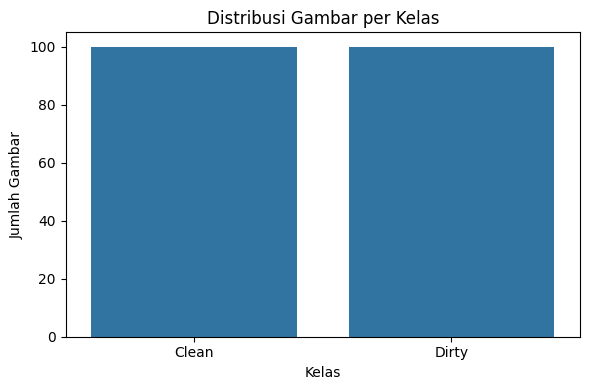

In [6]:
# -----------------------------
# 2. Visualisasi Distribusi Data
label_df = pd.DataFrame({'Label': labels})
plt.figure(figsize=(6,4))
sns.countplot(x='Label', data=label_df)
plt.title("Distribusi Gambar per Kelas")
plt.xlabel("Kelas")
plt.ylabel("Jumlah Gambar")
plt.tight_layout()
plt.show()

# Fungsi Visualisasi Distribusi Data

Fungsi ini digunakan untuk memahami sebaran jumlah gambar dalam setiap kelas yang terdapat dalam dataset. Dengan menampilkan grafik distribusi, kita dapat melihat apakah dataset memiliki jumlah sampel yang seimbang di setiap kategori atau terdapat ketidakseimbangan yang mungkin mempengaruhi hasil analisis atau performa model pembelajaran mesin.

Alur Kerja

1. Data label dikonversi menjadi bentuk DataFrame menggunakan pandas agar lebih mudah digunakan dalam visualisasi.
2. Membuat figur dengan ukuran 6x4 untuk menyesuaikan tampilan grafik.
3. Menggunakan seaborn untuk membuat diagram batang yang menunjukkan jumlah gambar dalam setiap kelas berdasarkan informasi dari DataFrame.
4. Menambahkan judul grafik untuk memberikan konteks yang jelas mengenai isi visualisasi.
5. Memberikan label pada sumbu x dan sumbu y untuk menjelaskan kategori kelas dan jumlah gambar.
6. Menggunakan fungsi penyesuaian tata letak agar grafik tampil lebih baik tanpa terpotong.
7. Menampilkan grafik distribusi untuk memberikan gambaran jumlah gambar dalam setiap kategori yang terdapat dalam dataset.


Proses ini berguna untuk mengidentifikasi ketidakseimbangan data dalam dataset sebelum analisis lebih lanjut atau penerapan model pembelajaran mesin. Jika jumlah gambar dalam setiap kelas sangat berbeda, diperlukan teknik seperti oversampling atau undersampling agar performa model tidak terpengaruh oleh distribusi yang tidak merata. Input dari proses ini adalah label kategori dari dataset, sedangkan outputnya berupa grafik distribusi jumlah gambar per kelas yang membantu memahami pola sebaran data.


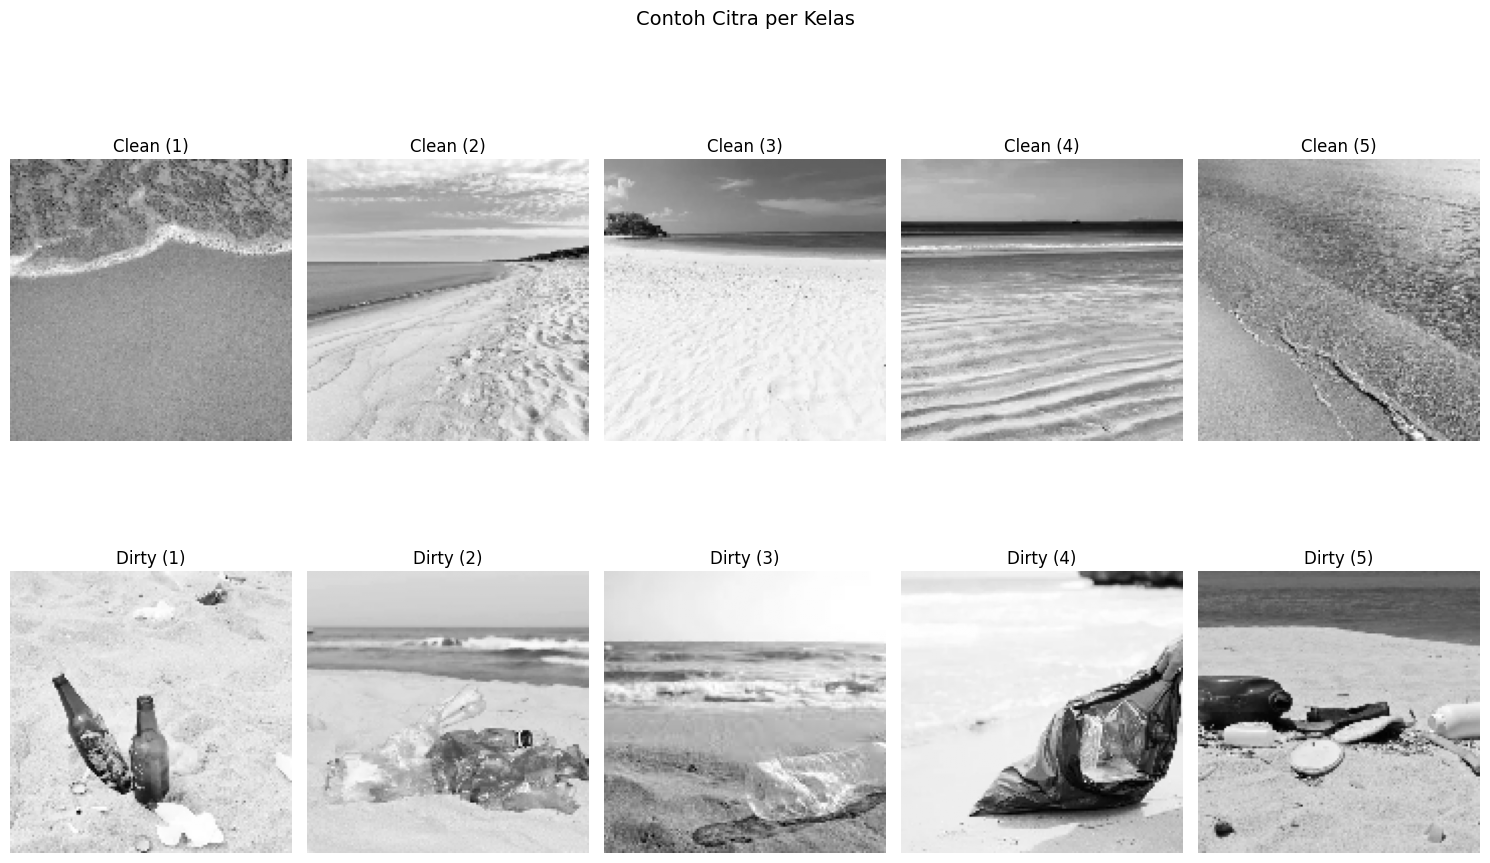

In [7]:
# -----------------------------
# 3. Menampilkan Sample Gambar per Kelas
unique_labels = np.unique(labels)
plt.figure(figsize=(15, 10))  # disesuaikan agar muat 5 kolom

for i, label in enumerate(unique_labels):
    idxs = np.where(labels == label)[0][:5]  # ambil 5 indeks pertama untuk label ini
    for j, idx in enumerate(idxs):
        plt.subplot(len(unique_labels), 5, i*5 + j + 1)
        plt.imshow(data[idx], cmap='gray')
        plt.title(f"{label} ({j+1})")
        plt.axis('off')

plt.suptitle("Contoh Citra per Kelas", fontsize=14)
plt.tight_layout()
plt.show()

In [8]:
# label_target = 'Dirty'  # Ganti ke 'Clean' jika ingin label lain

# # Ambil indeks yang sesuai dengan label_target
# idxs = np.where(labels == label_target)[0]
# total_images = len(idxs)

# cols = 5  # Jumlah kolom
# rows = (total_images + cols - 1) // cols  # Hitung jumlah baris yang dibutuhkan

# plt.figure(figsize=(15, 3 * rows))  # Atur ukuran fig sesuai jumlah baris

# for i, idx in enumerate(idxs):
#     plt.subplot(rows, cols, i + 1)
#     plt.imshow(data[idx], cmap='gray')
#     plt.title(file_name[idx])  # Gunakan nama file sebagai judul
#     plt.axis('off')

# plt.tight_layout(rect=[0, 0, 1, 0.978])  # Menyisakan 2.2% ruang di atas untuk suptitle
# plt.suptitle(f"Seluruh Citra Label '{label_target}' sebelum Preprocessing", fontsize=14)
# plt.show()

In [9]:
# label_target = 'Clean'

# # Ambil indeks yang sesuai dengan label_target
# idxs = np.where(labels == label_target)[0]
# total_images = len(idxs)

# cols = 5  # Jumlah kolom
# rows = (total_images + cols - 1) // cols  # Hitung jumlah baris yang dibutuhkan

# plt.figure(figsize=(15, 3 * rows))  # Atur ukuran fig sesuai jumlah baris

# for i, idx in enumerate(idxs):
#     plt.subplot(rows, cols, i + 1)
#     plt.imshow(data[idx], cmap='gray')
#     plt.title(file_name[idx])  # Gunakan nama file sebagai judul
#     plt.axis('off')

# plt.tight_layout(rect=[0, 0, 1, 0.978])  # Menyisakan 2.2% ruang di atas untuk suptitle
# plt.suptitle(f"Seluruh Citra Label '{label_target}' sebelum Preprocessing", fontsize=14)
# plt.show()

## Data Augmentation

### Define Augmentation Function


# Fungsi Horizontal Flip untuk Citra

In [10]:
def horizontal_flip(img):
    tinggi, panjang = img.shape[:2]
    flipped = [[img[i][-j - 1] for j in range(panjang)] for i in range(tinggi)]
    return np.array(flipped, dtype=np.uint8)

Fungsi horizontal_flip digunakan untuk membalik citra secara horizontal, sehingga gambar yang dihasilkan memiliki orientasi terbalik dari sisi kanan ke kiri. Teknik ini berguna dalam augmentasi data untuk memperluas variasi sampel dalam dataset pelatihan model pembelajaran mesin.

Alur Kerja

1. Mengambil ukuran citra dengan membaca nilai tinggi dan panjangnya.
2. Menggunakan list comprehension untuk membalik citra secara horizontal dengan cara menyalin setiap baris dan membalik urutan piksel dalam setiap kolom.
3. Menyimpan hasil flipping dalam array baru.
4. Mengonversi array hasil ke dalam tipe data NumPy dengan tipe uint8 agar sesuai dengan format citra standar.
5. Mengembalikan citra hasil flipping sebagai output.

Komponen utama yang digunakan adalah list comprehension untuk mengakses dan membalik nilai piksel dengan cara mengiterasi setiap baris citra serta membalikkan setiap kolomnya. Input dari fungsi ini adalah citra dalam bentuk array, sedangkan outputnya berupa citra hasil flipping secara horizontal, yang dapat digunakan dalam berbagai analisis dan aplikasi pembelajaran mesin.


# Melakukan Augmentasi Data dengan Horizontal Flip

In [11]:
# melakukan augmentasi data
data_augmented = []
labels_augmented = []
paths_augmented = []
file_name_augmented = []

for i in range(len(data)):
    original_img = data[i]
    label = labels[i]
    fname = file_name[i]

    flipped_img = horizontal_flip(original_img)

    data_augmented.append(flipped_img)
    labels_augmented.append(label)
    file_name_augmented.append(f"{fname}_flipped")
    paths_augmented.append(f"augmented/{fname}_flipped.png")

# konversi ke array numpy
data_augmented = np.array(data_augmented)
labels_augmented = np.array(labels_augmented)


Proses ini bertujuan untuk menambah variasi data dalam dataset dengan melakukan augmentasi menggunakan teknik pembalikan citra secara horizontal. Augmentasi ini membantu meningkatkan jumlah data latih serta memperkuat kemampuan model dalam mengenali pola dari berbagai perspektif.


Alur Kerja

1. Membuat list kosong untuk menyimpan citra yang telah diaugmentasi, label kategori, path gambar hasil augmentasi, dan nama file hasil augmentasi.
2. Melakukan iterasi pada setiap citra dalam dataset untuk diterapkan proses augmentasi.
3. Mengambil citra asli beserta labelnya dari dataset yang tersedia.
4. Memanggil fungsi horizontal_flip untuk membalikkan citra secara horizontal.
5. Menyimpan hasil augmentasi ke dalam list data_augmented, serta menyimpan label, nama file yang telah dimodifikasi, dan path untuk citra hasil augmentasi.
6. Setelah seluruh citra diubah, list data_augmented dan labels_augmented dikonversi ke array NumPy agar dapat digunakan dalam proses analisis dan pembelajaran mesin lebih lanjut.

Komponen utama yang berperan dalam proses ini adalah fungsi horizontal_flip, yang memastikan bahwa citra mengalami pembalikan secara horizontal, serta proses penyimpanan hasil augmentasi dalam struktur data yang sesuai. Input dari proses ini adalah dataset citra yang sudah tersedia, sedangkan outputnya berupa dataset baru yang berisi citra hasil augmentasi beserta labelnya untuk digunakan dalam tahap pelatihan model.


# Menampilkan Jumlah Data Sebelum dan Setelah Augmentasi

Kode ini digunakan untuk membandingkan jumlah sampel dalam dataset sebelum dan setelah proses augmentasi. Dengan menampilkan informasi ini, kita dapat memastikan bahwa augmentasi telah berhasil meningkatkan jumlah data yang tersedia untuk analisis lebih lanjut atau pelatihan model pembelajaran mesin.

Alur Kerja

1. Menghitung jumlah total citra sebelum dilakukan augmentasi dengan memeriksa panjang data.
2. Menghitung jumlah total citra setelah dilakukan augmentasi dengan memeriksa panjang data_augmented.
3. Menggunakan fungsi print untuk menampilkan informasi jumlah sampel sebelum dan sesudah augmentasi.

In [12]:
print("Data sebelum augmentasi: ", len(data))
print("Data setelah augmentasi: ", len(data_augmented))

Data sebelum augmentasi:  200
Data setelah augmentasi:  200


# Proses Penggabungan Data

In [13]:
# Gabungkan data dan label
data_combined = np.concatenate((data, data_augmented), axis=0)
labels_combined = np.concatenate((labels, labels_augmented), axis=0)

Proses ini digunakan untuk menggabungkan dataset sebelum dan setelah augmentasi

# Menampilkan Jumlah Data Setelah Penggabungan


Alur Kerja

1. Dataset citra sebelum dan setelah augmentasi digabung menggunakan np.concatenate untuk memastikan seluruh data tersedia dalam satu array data_combined.
2. File name dari dataset asli dan dataset augmentasi digabung dalam satu list menggunakan operasi penjumlahan antara file_name dan file_name_augmented.
3. Menggunakan fungsi print untuk menampilkan jumlah sampel dalam data_combined setelah penggabungan.
4. Menggunakan fungsi print untuk menampilkan jumlah file yang ada dalam file_name_combined.
5. Berdasarkan komentar dalam kode, hasil dari file_name_combined adalah 400, yang menunjukkan bahwa dataset telah diperluas dengan tambahan citra hasil augmentasi.

Bagian ini berfungsi untuk memeriksa apakah jumlah data setelah penggabungan sudah sesuai dengan yang diharapkan. Dengan menampilkan informasi ini, kita dapat memastikan bahwa dataset telah diperluas dengan benar tanpa ada kesalahan dalam penggabungan. Input dari proses ini adalah dataset sebelum dan setelah augmentasi, sedangkan outputnya berupa informasi jumlah total sampel setelah penggabungan yang ditampilkan di layar.


In [14]:
print(len(data_combined))
file_name_combined = file_name + file_name_augmented  # hasilnya 400
print(len(file_name_combined))

400
400


# Visualisasi Citra Per Kelas Setelah Preprocessing

Kode ini digunakan untuk menampilkan contoh citra dari setiap kelas setelah menjalani tahap preprocessing, termasuk penerapan kernel Gaussian dan deteksi tepi dengan kernel Prewitt. Visualisasi ini membantu memahami bagaimana preprocessing mempengaruhi struktur dan fitur dalam citra.

Alur Kerja

1. Mengambil daftar label unik dari labels_combined untuk mengetahui jumlah kelas yang ada dalam dataset.
2. Membuat figur dengan ukuran yang disesuaikan dengan jumlah kelas agar tampilan gambar optimal.
3. Melakukan iterasi untuk setiap kelas dalam dataset.
4. Mengambil maksimal lima indeks pertama dari setiap kelas untuk ditampilkan sebagai sampel citra.
5. Menampilkan setiap citra hasil preprocessing menggunakan plt.imshow dengan skala grayscale.
6. Menambahkan judul untuk masing-masing citra agar setiap sampel memiliki identifikasi yang jelas.
7. Menonaktifkan tampilan sumbu koordinat untuk visualisasi yang lebih bersih.
8. Memberikan judul utama yang menjelaskan bahwa citra telah menjalani tahap preprocessing dengan Gaussian dan Prewitt.
9. Menyesuaikan tata letak menggunakan plt.tight_layout agar judul utama tidak terpotong.
10. Menampilkan hasil visualisasi sebagai output.


Komponen utama yang digunakan dalam visualisasi ini adalah labels_combined yang memastikan kesesuaian antara citra dan kategorinya, serta pengaturan tata letak untuk memastikan tampilan citra lebih jelas dan terstruktur. Input dari proses ini adalah dataset citra yang telah diproses, sedangkan outputnya berupa tampilan visual sampel citra dari setiap kelas setelah menjalani tahap preprocessing.


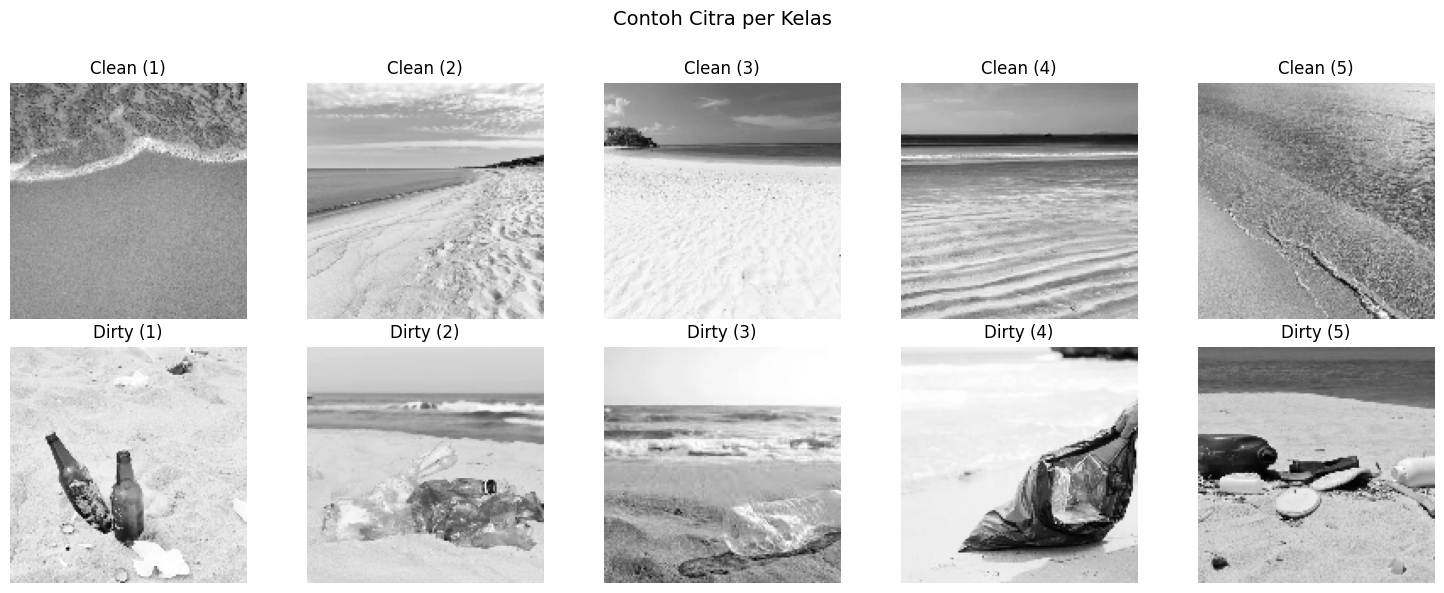

In [15]:
# Gunakan labels_combined karena dataPreprocessed berasal dari data_combined
unique_labels = np.unique(labels_combined)

plt.figure(figsize=(15, 3 * len(unique_labels)))  # Tinggi disesuaikan jumlah kelas

for i, label in enumerate(unique_labels):
    # Ambil indeks untuk label tersebut
    idxs = np.where(labels_combined == label)[0][:5]  # Ambil maksimal 5 indeks pertama

    for j, idx in enumerate(idxs):
        plt.subplot(len(unique_labels), 5, i * 5 + j + 1)
        plt.imshow(data_combined[idx], cmap='gray')
        plt.title(f"{label} ({j + 1})")
        plt.axis('off')

plt.suptitle("Contoh Citra per Kelas", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.97])  # Supaya title tidak terpotong
plt.show()


In [16]:
# label_target = 'Dirty'

# # Ambil indeks yang sesuai dengan label_target dari labels_combined
# idxs = np.where(labels_combined == label_target)[0]
# total_images = len(idxs)

# cols = 5  # Jumlah kolom per baris
# rows = (total_images + cols - 1) // cols  # Jumlah baris yang dibutuhkan

# plt.figure(figsize=(15, 3 * rows))  # Ukuran gambar disesuaikan jumlah baris

# for i, idx in enumerate(idxs):
#     plt.subplot(rows, cols, i + 1)
#     plt.imshow(dataPreprocessed[idx], cmap='gray')
#     plt.title(file_name_combined[idx])  # Gunakan nama file gabungan
#     plt.axis('off')

# plt.tight_layout(rect=[0, 0, 1, 0.97])  # Supaya suptitle tidak terpotong
# plt.suptitle(f"Seluruh Citra Label '{label_target}' Setelah Preprocessing (Gaussian + Prewitt)", fontsize=14)
# plt.show()


In [17]:
# label_target = 'Clean'

# # Ambil indeks yang sesuai dengan label_target dari labels_combined
# idxs = np.where(labels_combined == label_target)[0]
# total_images = len(idxs)

# cols = 5  # Jumlah kolom per baris
# rows = (total_images + cols - 1) // cols  # Jumlah baris yang dibutuhkan

# plt.figure(figsize=(15, 3 * rows))  # Ukuran gambar disesuaikan jumlah baris

# for i, idx in enumerate(idxs):
#     plt.subplot(rows, cols, i + 1)
#     plt.imshow(dataPreprocessed[idx], cmap='gray')
#     plt.title(file_name_combined[idx])  # Gunakan nama file gabungan
#     plt.axis('off')

# plt.tight_layout(rect=[0, 0, 1, 0.97])  # Supaya suptitle tidak terpotong
# plt.suptitle(f"Seluruh Citra Label '{label_target}' Setelah Preprocessing (Gaussian + Prewitt)", fontsize=14)
# plt.show()


### Feature Extraction

# Fungsi GLCM untuk Ekstraksi Tekstur Citra

In [18]:
def glcm(image, derajat):
    if derajat == 0:
        angles = [0]
    elif derajat == 45:
        angles = [np.pi / 4]
    elif derajat == 90:
        angles = [np.pi / 2]
    elif derajat == 135:
        angles = [3 * np.pi / 4]
    else:
        raise ValueError("Invalid angle. It should be one of the following: 0, 45, 90, 135.")
    
    # mengembalikan matrix glcm dari image
    glcm = graycomatrix(image, [1], angles, 256, symmetric=True, normed=True)
    return glcm

Fungsi glcm digunakan untuk menghitung matriks Grey-Level Co-occurrence Matrix (GLCM), yang merupakan metode ekstraksi fitur tekstur dalam pemrosesan citra. Dengan menggunakan GLCM, kita dapat menganalisis distribusi spasial intensitas piksel dalam gambar berdasarkan sudut tertentu.

Alur Kerja

1. Memeriksa nilai derajat yang diberikan untuk menentukan sudut matriks GLCM.
2. Mengonversi derajat menjadi nilai sudut yang sesuai dalam radian:
   - 0 derajat untuk arah horizontal.
   - 45 derajat untuk arah diagonal atas kanan.
   - 90 derajat untuk arah vertikal.
   - 135 derajat untuk arah diagonal atas kiri.
3. Jika derajat tidak sesuai dengan nilai yang telah ditentukan, fungsi akan menghasilkan error untuk memastikan input tetap valid.
4. Menggunakan fungsi graycomatrix dari skimage untuk menghitung matriks GLCM dengan parameter:
   - Jarak antar piksel = 1.
   - Sudut sesuai dengan derajat yang telah dikonversi.
   - Level warna sebanyak 256 (untuk gambar dengan 8-bit depth).
   - Matriks disusun secara simetris dan dinormalisasi untuk meningkatkan akurasi.
5. Mengembalikan matriks GLCM sebagai output.

Komponen utama dalam proses ini adalah konversi sudut untuk memastikan arah perhitungan sesuai dengan kebutuhan analisis, serta penerapan graycomatrix yang menghasilkan matriks yang merepresentasikan hubungan spasial antar piksel. Input dari fungsi ini adalah citra grayscale yang ingin dianalisis, sedangkan outputnya berupa matriks GLCM yang dapat digunakan untuk ekstraksi fitur tekstur sebelum diterapkan dalam model pembelajaran mesin.


# Fungsi Korelasi untuk Analisis GLCM

In [19]:
def correlation(matriks):
	return graycoprops(matriks, 'correlation')[0, 0]

Properti korelasi dalam GLCM berguna untuk menentukan apakah nilai piksel dalam citra memiliki hubungan yang kuat satu sama lain. Nilai korelasi yang tinggi menunjukkan bahwa perubahan intensitas antar piksel memiliki pola yang konsisten, sedangkan nilai rendah menunjukkan adanya variasi lebih besar. Komponen utama dalam proses ini adalah fungsi graycoprops, yang menghitung berbagai properti tekstur dari matriks. Input dari fungsi ini adalah matriks hasil perhitungan GLCM, sedangkan outputnya berupa nilai korelasi yang merepresentasikan hubungan antar piksel dalam gambar.

Alur Kerja

1. Fungsi menerima matriks sebagai input.
2. Menggunakan fungsi graycoprops untuk menghitung nilai korelasi berdasarkan matriks tersebut.
3. Mengakses nilai korelasi dari hasil perhitungan untuk mendapatkan angka tunggal.
4. Mengembalikan nilai korelasi sebagai output.

# Fungsi Dissimilarity untuk Analisis GLCM

In [20]:
def dissimilarity(matriks):
    return graycoprops(matriks, 'dissimilarity')[0, 0]

Fungsi dissimilarity digunakan untuk menghitung properti dissimilarity dari matriks Grey-Level Co-occurrence Matrix. Dissimilarity mengukur tingkat perbedaan antara piksel dalam suatu citra, di mana nilai yang lebih tinggi menunjukkan variasi intensitas yang lebih besar.

Alur Kerja

1. Fungsi menerima matriks sebagai input.
2. Menggunakan fungsi graycoprops untuk menghitung nilai dissimilarity berdasarkan matriks tersebut.
3. Mengakses nilai hasil perhitungan untuk mendapatkan angka tunggal.
4. Mengembalikan nilai dissimilarity sebagai output.

Nilai yang tinggi menunjukkan adanya perubahan drastis dalam pola tekstur, sedangkan nilai rendah menunjukkan transisi yang lebih halus. Komponen utama dalam proses ini adalah fungsi graycoprops, yang menghitung berbagai properti tekstur dari matriks. Input dari fungsi ini adalah matriks hasil perhitungan GLCM, sedangkan outputnya berupa nilai dissimilarity yang merepresentasikan tingkat variasi tekstur dalam gambar.


# Fungsi Homogeneity untuk Analisis GLCM

In [21]:
def homogenity(matriks):
    return graycoprops(matriks, 'homogeneity')[0, 0]

Fungsi homogenity digunakan untuk menghitung properti homogeneity dari matriks Grey-Level Co-occurrence Matrix. Homogeneity mengukur seberapa mirip piksel yang berdekatan dalam suatu citra, di mana nilai yang lebih tinggi menunjukkan pola tekstur yang lebih seragam.
Alur Kerja

1. Fungsi menerima matriks sebagai input.
2. Menggunakan fungsi graycoprops untuk menghitung nilai homogeneity berdasarkan matriks tersebut.
3. Mengakses nilai hasil perhitungan untuk mendapatkan angka tunggal.
4. Mengembalikan nilai homogeneity sebagai output.

Nilai yang tinggi menunjukkan bahwa intensitas piksel dalam citra cenderung seragam, sementara nilai yang lebih rendah menunjukkan adanya perbedaan yang signifikan antar piksel. Komponen utama dalam proses ini adalah fungsi graycoprops, yang menghitung berbagai properti tekstur dari matriks. Input dari fungsi ini adalah matriks hasil perhitungan GLCM, sedangkan outputnya berupa nilai homogeneity yang merepresentasikan keseragaman tekstur dalam gambar.


# Fungsi Contrast untuk Analisis GLCM

In [22]:
def contrast(matriks):
    return graycoprops(matriks, 'contrast')[0, 0]

Fungsi contrast digunakan untuk menghitung properti contrast dari matriks Grey-Level Co-occurrence Matrix. Contrast mengukur perbedaan intensitas antara piksel yang berdekatan dalam citra, di mana nilai yang lebih tinggi menunjukkan adanya perubahan drastis dalam tingkat kecerahan.

Alur Kerja

1. Fungsi menerima matriks sebagai input.
2. Menggunakan fungsi graycoprops untuk menghitung nilai contrast berdasarkan matriks tersebut.
3. Mengakses nilai hasil perhitungan untuk mendapatkan angka tunggal.
4. Mengembalikan nilai contrast sebagai output.

Nilai contrast yang tinggi menunjukkan adanya transisi tajam antara area terang dan gelap, sementara nilai rendah menunjukkan citra yang lebih seragam tanpa perubahan intensitas yang besar. Komponen utama dalam proses ini adalah fungsi graycoprops, yang menghitung berbagai properti tekstur dari matriks. Input dari fungsi ini adalah matriks hasil perhitungan GLCM, sedangkan outputnya berupa nilai contrast yang merepresentasikan tingkat perbedaan intensitas dalam gambar.


# Fungsi ASM untuk Analisis GLCM

In [23]:
def ASM(matriks):
    return graycoprops(matriks, 'ASM')[0, 0]

Fungsi ASM digunakan untuk menghitung properti Angular Second Moment (ASM) dari matriks Grey-Level Co-occurrence Matrix. ASM mengukur tingkat kehalusan tekstur dalam citra, di mana nilai yang lebih tinggi menunjukkan pola yang lebih homogen dan teratur.

Alur Kerja

1. Fungsi menerima matriks sebagai input.
2. Menggunakan fungsi graycoprops untuk menghitung nilai ASM berdasarkan matriks tersebut.
3. Mengakses nilai hasil perhitungan untuk mendapatkan angka tunggal.
4. Mengembalikan nilai ASM sebagai output.

Nilai ASM yang tinggi menunjukkan bahwa citra memiliki struktur yang teratur dengan sedikit variasi dalam intensitas piksel, sementara nilai rendah menunjukkan tekstur yang lebih kasar atau tidak beraturan. Komponen utama dalam proses ini adalah fungsi graycoprops, yang menghitung berbagai properti tekstur dari matriks. Input dari fungsi ini adalah matriks hasil perhitungan GLCM, sedangkan outputnya berupa nilai ASM yang merepresentasikan tingkat kekonsistenan pola tekstur dalam gambar.


# Fungsi Energy untuk Analisis GLCM

In [24]:
def energy(matriks):
    return graycoprops(matriks, 'energy')[0, 0]

Fungsi energy digunakan untuk menghitung properti energy dari matriks Grey-Level Co-occurrence Matrix. Energy mengukur tingkat keteraturan dalam pola tekstur citra, di mana nilai yang lebih tinggi menunjukkan distribusi intensitas piksel yang lebih konsisten.

Alur Kerja

1. Fungsi menerima matriks sebagai input.
2. Menggunakan fungsi graycoprops untuk menghitung nilai energy berdasarkan matriks tersebut.
3. Mengakses nilai hasil perhitungan untuk mendapatkan angka tunggal.
4. Mengembalikan nilai energy sebagai output.

Nilai energy yang tinggi menunjukkan bahwa pola tekstur dalam gambar lebih homogen, sementara nilai yang lebih rendah menunjukkan adanya variasi yang lebih besar. Komponen utama dalam proses ini adalah fungsi graycoprops, yang menghitung berbagai properti tekstur dari matriks. Input dari fungsi ini adalah matriks hasil perhitungan GLCM, sedangkan outputnya berupa nilai energy yang merepresentasikan tingkat keteraturan dalam gambar.


# Fungsi Entropy untuk Analisis GLCM

In [25]:
def entropyGlcm(matriks):
    return entropy(matriks.ravel())

Fungsi entropyGlcm digunakan untuk menghitung nilai entropy dari matriks Grey-Level Co-occurrence Matrix. Entropy mengukur tingkat ketidakberaturan dalam pola tekstur citra, di mana nilai yang lebih tinggi menunjukkan variasi intensitas yang lebih kompleks.

Alur Kerja

1. Fungsi menerima matriks sebagai input.
2. Menggunakan metode ravel untuk meratakan matriks menjadi satu dimensi agar dapat dihitung dengan fungsi entropy.
3. Menggunakan fungsi entropy untuk menghitung nilai entropy dari matriks tersebut.
4. Mengembalikan nilai entropy sebagai output.

Nilai entropy yang tinggi menunjukkan adanya kompleksitas dalam pola tekstur, sedangkan nilai yang lebih rendah menunjukkan pola yang lebih sederhana dan teratur. Komponen utama dalam proses ini adalah fungsi entropy, yang menghitung tingkat ketidakberaturan berdasarkan distribusi intensitas piksel dalam matriks. Input dari fungsi ini adalah matriks hasil perhitungan GLCM, sedangkan outputnya berupa nilai entropy yang merepresentasikan kompleksitas tekstur dalam gambar.


# Perhitungan GLCM untuk Berbagai Sudut

In [26]:
Derajat0 = []
Derajat45 = []
Derajat90 = []
Derajat135 = []
for i in range(len(data_combined)):
    D0 = glcm(data_combined[i], 0)
    D45 = glcm(data_combined[i], 45)
    D90 = glcm(data_combined[i], 90)
    D135 = glcm(data_combined[i], 135)
    Derajat0.append(D0)
    Derajat45.append(D45)
    Derajat90.append(D90)
    Derajat135.append(D135)

Kode ini digunakan untuk menghitung matriks Grey-Level Co-occurrence Matrix (GLCM) pada berbagai sudut orientasi untuk setiap citra yang telah menjalani preprocessing.

Alur Kerja

1. Membuat empat list kosong untuk menyimpan hasil perhitungan GLCM pada sudut 0, 45, 90, dan 135 derajat.
2. Melakukan iterasi pada setiap citra dalam dataset yang telah diproses.
3. Menghitung matriks GLCM untuk sudut 0 derajat dan menyimpannya dalam list Derajat0.
4. Menghitung matriks GLCM untuk sudut 45 derajat dan menyimpannya dalam list Derajat45.
5. Menghitung matriks GLCM untuk sudut 90 derajat dan menyimpannya dalam list Derajat90.
6. Menghitung matriks GLCM untuk sudut 135 derajat dan menyimpannya dalam list Derajat135.

Proses ini bertujuan untuk mengevaluasi distribusi spasial intensitas piksel dalam citra berdasarkan berbagai sudut orientasi, yang berguna dalam analisis tekstur untuk klasifikasi atau pengenalan pola. Komponen utama dalam proses ini adalah fungsi glcm, yang menghasilkan matriks berdasarkan sudut yang diberikan. Input dari proses ini adalah dataset citra yang telah diproses sebelumnya, sedangkan outputnya berupa empat list yang berisi hasil perhitungan GLCM pada berbagai sudut.


# Inisialisasi Variabel untuk Ekstraksi Fitur GLCM

In [27]:
Kontras0, Kontras45, Kontras90, Kontras135 = [], [], [], []
dissimilarity0, dissimilarity45, dissimilarity90, dissimilarity135 =  [], [], [], []
homogenity0, homogenity45, homogenity90, homogenity135 = [], [], [], []
entropy0, entropy45, entropy90, entropy135 =  [], [], [], []
ASM0, ASM45, ASM90, ASM135 =  [], [], [], []
energy0, energy45, energy90, energy135 =  [], [], [], []
correlation0, correlation45, correlation90, correlation135 = [], [], [], []

Kode ini digunakan untuk membuat daftar kosong yang akan menyimpan hasil perhitungan berbagai fitur tekstur berdasarkan matriks Grey-Level Co-occurrence Matrix (GLCM). Fitur ini nantinya dapat digunakan untuk analisis tekstur dalam pemrosesan citra.

Alur Kerja

1. Membuat daftar kosong untuk setiap fitur tekstur GLCM yang akan dihitung pada sudut 0, 45, 90, dan 135 derajat.
2. Fitur yang diinisialisasi meliputi:
   - Contrast
   - Dissimilarity
   - Homogeneity
   - Entropy
   - Angular Second Moment (ASM)
   - Energy
   - Correlation
3. Daftar ini nantinya akan diisi dengan hasil perhitungan fitur-fitur tekstur dari setiap citra dalam dataset.

Fitur-fitur ini memainkan peran penting dalam analisis tekstur citra, terutama untuk pengenalan pola dan klasifikasi berdasarkan karakteristik visualnya. Komponen utama dalam proses ini adalah pengorganisasian data ke dalam list berdasarkan sudut orientasi yang berbeda. Input dari proses ini adalah hasil perhitungan GLCM dari citra yang telah diproses sebelumnya, sedangkan outputnya berupa daftar yang berisi nilai fitur tekstur yang telah diekstraksi.


# Perhitungan Fitur Korelasi dari GLCM

In [28]:
for i in range(len(data_combined)):
    C0 = correlation(Derajat0[i])
    correlation0.append(C0)
    C45 = correlation(Derajat45[i])
    correlation45.append(C45)
    C90 = correlation(Derajat90[i])
    correlation90.append(C90)
    C135 = correlation(Derajat135[i])
    correlation135.append(C135)

Kode ini digunakan untuk menghitung nilai korelasi dari matriks Grey-Level Co-occurrence Matrix (GLCM) pada berbagai sudut orientasi dan menyimpannya ke dalam daftar.

Alur Kerja

1. Melakukan iterasi untuk setiap citra dalam dataset yang telah diproses.
2. Menghitung nilai korelasi dari matriks GLCM pada sudut 0 derajat menggunakan fungsi correlation dan menyimpannya dalam correlation0.
3. Menghitung nilai korelasi dari matriks GLCM pada sudut 45 derajat dan menyimpannya dalam correlation45.
4. Menghitung nilai korelasi dari matriks GLCM pada sudut 90 derajat dan menyimpannya dalam correlation90.
5. Menghitung nilai korelasi dari matriks GLCM pada sudut 135 derajat dan menyimpannya dalam correlation135.

Nilai korelasi yang tinggi menunjukkan pola tekstur yang lebih teratur, sementara nilai yang lebih rendah menunjukkan variasi yang lebih besar. Komponen utama dalam proses ini adalah matriks GLCM yang dihitung untuk setiap citra dan fungsi correlation yang mengekstrak fitur tekstur dari matriks tersebut. Input dari proses ini adalah dataset citra yang telah diproses sebelumnya, sedangkan outputnya berupa daftar yang berisi nilai korelasi dari masing-masing sudut orientasi.


# Perhitungan Fitur Kontras dari GLCM

In [29]:
for i in range(len(data_combined)):
    K0 = contrast(Derajat0[i])
    K45 = contrast(Derajat45[i])
    K90 = contrast(Derajat90[i])
    K135 = contrast(Derajat135[i])
    Kontras0.append(K0)
    Kontras45.append(K45)
    Kontras90.append(K90)
    Kontras135.append(K135)

Kode ini digunakan untuk menghitung nilai kontras dari matriks Grey-Level Co-occurrence Matrix (GLCM) pada berbagai sudut orientasi dan menyimpannya ke dalam daftar.

Alur Kerja

1. Melakukan iterasi untuk setiap citra dalam dataset yang telah diproses.
2. Menghitung nilai kontras dari matriks GLCM pada sudut 0 derajat menggunakan fungsi contrast dan menyimpannya dalam Kontras0.
3. Menghitung nilai kontras dari matriks GLCM pada sudut 45 derajat dan menyimpannya dalam Kontras45.
4. Menghitung nilai kontras dari matriks GLCM pada sudut 90 derajat dan menyimpannya dalam Kontras90.
5. Menghitung nilai kontras dari matriks GLCM pada sudut 135 derajat dan menyimpannya dalam Kontras135.

Nilai kontras yang tinggi menunjukkan adanya perubahan tajam antara area terang dan gelap, sementara nilai rendah menunjukkan pola yang lebih seragam tanpa perubahan intensitas yang besar. Komponen utama dalam proses ini adalah matriks GLCM yang dihitung untuk setiap citra dan fungsi contrast yang mengekstrak fitur tekstur dari matriks tersebut. Input dari proses ini adalah dataset citra yang telah diproses sebelumnya, sedangkan outputnya berupa daftar yang berisi nilai kontras dari masing-masing sudut orientasi.


# Perhitungan Fitur Dissimilarity dari GLCM

In [30]:
for i in range(len(data_combined)):
    Dis0 = dissimilarity(Derajat0[i])
    Dis45 = dissimilarity(Derajat45[i])
    Dis90 = dissimilarity(Derajat90[i])
    Dis135 = dissimilarity(Derajat135[i])
    dissimilarity0.append(Dis0)
    dissimilarity45.append(Dis45)
    dissimilarity90.append(Dis90)
    dissimilarity135.append(Dis135)

Kode ini digunakan untuk menghitung nilai dissimilarity dari matriks Grey-Level Co-occurrence Matrix (GLCM) pada berbagai sudut orientasi dan menyimpannya ke dalam daftar.

Alur Kerja

1. Melakukan iterasi untuk setiap citra dalam dataset yang telah diproses.
2. Menghitung nilai dissimilarity dari matriks GLCM pada sudut 0 derajat menggunakan fungsi dissimilarity dan menyimpannya dalam dissimilarity0.
3. Menghitung nilai dissimilarity dari matriks GLCM pada sudut 45 derajat dan menyimpannya dalam dissimilarity45.
4. Menghitung nilai dissimilarity dari matriks GLCM pada sudut 90 derajat dan menyimpannya dalam dissimilarity90.
5. Menghitung nilai dissimilarity dari matriks GLCM pada sudut 135 derajat dan menyimpannya dalam dissimilarity135.

Nilai yang tinggi menunjukkan adanya kontras yang signifikan dalam pola tekstur, sementara nilai rendah menunjukkan transisi yang lebih halus. Komponen utama dalam proses ini adalah matriks GLCM yang dihitung untuk setiap citra dan fungsi dissimilarity yang mengekstrak fitur tekstur dari matriks tersebut. Input dari proses ini adalah dataset citra yang telah diproses sebelumnya, sedangkan outputnya berupa daftar yang berisi nilai dissimilarity dari masing-masing sudut orientasi.


# Perhitungan Fitur Homogeneity dari GLCM

In [31]:
for i in range(len(data_combined)):
    H0 = homogenity(Derajat0[i])
    H45 = homogenity(Derajat45[i])
    H90 = homogenity(Derajat90[i])
    H135 = homogenity(Derajat135[i])
    homogenity0.append(H0)
    homogenity45.append(H45)
    homogenity90.append(H90)
    homogenity135.append(H135)

Kode ini digunakan untuk menghitung nilai homogeneity dari matriks Grey-Level Co-occurrence Matrix (GLCM) pada berbagai sudut orientasi dan menyimpannya ke dalam daftar.

Alur Kerja

1. Melakukan iterasi untuk setiap citra dalam dataset yang telah diproses.
2. Menghitung nilai homogeneity dari matriks GLCM pada sudut 0 derajat menggunakan fungsi homogenity dan menyimpannya dalam homogenity0.
3. Menghitung nilai homogeneity dari matriks GLCM pada sudut 45 derajat dan menyimpannya dalam homogenity45.
4. Menghitung nilai homogeneity dari matriks GLCM pada sudut 90 derajat dan menyimpannya dalam homogenity90.
5. Menghitung nilai homogeneity dari matriks GLCM pada sudut 135 derajat dan menyimpannya dalam homogenity135.

Nilai yang lebih tinggi menunjukkan pola tekstur yang lebih seragam, sementara nilai lebih rendah menunjukkan adanya perbedaan yang signifikan antar piksel. Komponen utama dalam proses ini adalah matriks GLCM yang dihitung untuk setiap citra dan fungsi homogenity yang mengekstrak fitur tekstur dari matriks tersebut. Input dari proses ini adalah dataset citra yang telah diproses sebelumnya, sedangkan outputnya berupa daftar yang berisi nilai homogeneity dari masing-masing sudut orientasi.


# Perhitungan Fitur Entropy dari GLCM

In [32]:
for i in range(len(data_combined)):
    E0 = entropyGlcm(Derajat0[i])
    E45 = entropyGlcm(Derajat45[i])
    E90 = entropyGlcm(Derajat90[i])
    E135 = entropyGlcm(Derajat135[i])
    entropy0.append(E0)
    entropy45.append(E45)
    entropy90.append(E90)
    entropy135.append(E135)

Kode ini digunakan untuk menghitung nilai entropy dari matriks Grey-Level Co-occurrence Matrix (GLCM) pada berbagai sudut orientasi dan menyimpannya ke dalam daftar.

Alur Kerja

1. Melakukan iterasi untuk setiap citra dalam dataset yang telah diproses.
2. Menghitung nilai entropy dari matriks GLCM pada sudut 0 derajat menggunakan fungsi entropyGlcm dan menyimpannya dalam entropy0.
3. Menghitung nilai entropy dari matriks GLCM pada sudut 45 derajat dan menyimpannya dalam entropy45.
4. Menghitung nilai entropy dari matriks GLCM pada sudut 90 derajat dan menyimpannya dalam entropy90.
5. Menghitung nilai entropy dari matriks GLCM pada sudut 135 derajat dan menyimpannya dalam entropy135.

Nilai entropy yang tinggi menunjukkan kompleksitas yang lebih besar dalam distribusi intensitas piksel, sedangkan nilai yang lebih rendah menunjukkan pola tekstur yang lebih teratur. Komponen utama dalam proses ini adalah matriks GLCM yang dihitung untuk setiap citra dan fungsi entropyGlcm yang mengekstrak fitur tekstur dari matriks tersebut. Input dari proses ini adalah dataset citra yang telah diproses sebelumnya, sedangkan outputnya berupa daftar yang berisi nilai entropy dari masing-masing sudut orientasi.


# Perhitungan Fitur ASM dari GLCM

In [33]:
for i in range(len(data_combined)):
    A0 = ASM(Derajat0[i])
    A45 = ASM(Derajat45[i])
    A90 = ASM(Derajat90[i])
    A135 = ASM(Derajat135[i])
    ASM0.append(A0)
    ASM45.append(A45)
    ASM90.append(A90)
    ASM135.append(A135)

Kode ini digunakan untuk menghitung nilai Angular Second Moment (ASM) dari matriks Grey-Level Co-occurrence Matrix (GLCM) pada berbagai sudut orientasi dan menyimpannya ke dalam daftar.

Alur Kerja

1. Melakukan iterasi untuk setiap citra dalam dataset yang telah diproses.
2. Menghitung nilai ASM dari matriks GLCM pada sudut 0 derajat menggunakan fungsi ASM dan menyimpannya dalam ASM0.
3. Menghitung nilai ASM dari matriks GLCM pada sudut 45 derajat dan menyimpannya dalam ASM45.
4. Menghitung nilai ASM dari matriks GLCM pada sudut 90 derajat dan menyimpannya dalam ASM90.
5. Menghitung nilai ASM dari matriks GLCM pada sudut 135 derajat dan menyimpannya dalam ASM135.

Nilai ASM yang tinggi menunjukkan pola yang lebih terstruktur dan homogen, sementara nilai lebih rendah menunjukkan variasi yang lebih besar dalam tekstur. Komponen utama dalam proses ini adalah matriks GLCM yang dihitung untuk setiap citra dan fungsi ASM yang mengekstrak fitur tekstur dari matriks tersebut. Input dari proses ini adalah dataset citra yang telah diproses sebelumnya, sedangkan outputnya berupa daftar yang berisi nilai ASM dari masing-masing sudut orientasi.


# Perhitungan Fitur Energy dari GLCM

In [34]:
for i in range(len(data_combined)):
    ER0 = energy(Derajat0[i])
    ER45 = energy(Derajat45[i])
    ER90 = energy(Derajat90[i])
    ER135 = energy(Derajat135[i])
    energy0.append(ER0)
    energy45.append(ER45)
    energy90.append(ER90)
    energy135.append(ER135)

Kode ini digunakan untuk menghitung nilai energy dari matriks Grey-Level Co-occurrence Matrix (GLCM) pada berbagai sudut orientasi dan menyimpannya ke dalam daftar.

Alur Kerja

1. Melakukan iterasi untuk setiap citra dalam dataset yang telah diproses.
2. Menghitung nilai energy dari matriks GLCM pada sudut 0 derajat menggunakan fungsi energy dan menyimpannya dalam energy0.
3. Menghitung nilai energy dari matriks GLCM pada sudut 45 derajat dan menyimpannya dalam energy45.
4. Menghitung nilai energy dari matriks GLCM pada sudut 90 derajat dan menyimpannya dalam energy90.
5. Menghitung nilai energy dari matriks GLCM pada sudut 135 derajat dan menyimpannya dalam energy135.

Nilai energy yang lebih tinggi menunjukkan distribusi intensitas piksel yang lebih seragam, sedangkan nilai lebih rendah menunjukkan adanya variasi yang lebih besar dalam tekstur. Komponen utama dalam proses ini adalah matriks GLCM yang dihitung untuk setiap citra dan fungsi energy yang mengekstrak fitur tekstur dari matriks tersebut. Input dari proses ini adalah dataset citra yang telah diproses sebelumnya, sedangkan outputnya berupa daftar yang berisi nilai energy dari masing-masing sudut orientasi.


### Write the extraction's results to CSV 

# Penyimpanan dan Pemrosesan Data Ekstraksi Fitur GLCM

Kode ini digunakan untuk menyusun hasil ekstraksi fitur dari matriks Grey-Level Co-occurrence Matrix (GLCM) ke dalam format tabel menggunakan pandas serta menyimpannya dalam file CSV.

Alur Kerja

1. Membuat dictionary dataTable yang menyimpan berbagai fitur tekstur yang telah dihitung berdasarkan matriks GLCM:
   - Filename: Nama file citra.
   - Label: Kategori citra.
   - Contrast: Nilai kontras untuk berbagai sudut orientasi.
   - Homogeneity: Nilai keseragaman tekstur.
   - Dissimilarity: Nilai perbedaan antar piksel dalam citra.
   - Entropy: Nilai kompleksitas pola tekstur.
   - ASM: Nilai Angular Second Moment untuk evaluasi tingkat kehalusan tekstur.
   - Energy: Nilai keteraturan distribusi intensitas piksel.
   - Correlation: Nilai korelasi antar piksel dalam citra.
2. Mengonversi dictionary menjadi DataFrame menggunakan pandas.
3. Menyimpan hasil ekstraksi fitur ke dalam file CSV dengan nama hasil_ekstraksi_1.csv.
4. Membaca kembali file CSV yang telah disimpan untuk verifikasi.
5. Menampilkan isi DataFrame hasil ekstraksi fitur.

Proses ini bertujuan untuk mengorganisasi hasil ekstraksi fitur tekstur dalam bentuk tabel agar lebih mudah digunakan dalam analisis data atau pemodelan. Format CSV yang digunakan memungkinkan hasil ekstraksi disimpan dengan baik dan dapat dibuka menggunakan berbagai alat analisis data. Input dari proses ini adalah hasil perhitungan fitur tekstur GLCM dari dataset citra, sedangkan outputnya berupa file CSV yang berisi informasi fitur tekstur yang telah dihitung untuk setiap citra dalam dataset.


In [35]:
dataTable = {'Filename': file_name_combined, 'Label': labels_combined,
        'Contrast0': Kontras0, 'Contrast45': Kontras45, 'Contrast90': Kontras90, 'Contrast135': Kontras135,
        'Homogeneity0': homogenity0, 'Homogeneity45': homogenity45, 'Homogeneity90': homogenity90, 'Homogeneity135': homogenity135,
        'Dissimilarity0': dissimilarity0, 'Dissimilarity45': dissimilarity45, 'Dissimilarity90': dissimilarity90, 'Dissimilarity135': dissimilarity135,
        'Entropy0': entropy0, 'Entropy45': entropy45, 'Entropy90': entropy90, 'Entropy135': entropy135,
        'ASM0': ASM0, 'ASM45': ASM45, 'ASM90': ASM90, 'ASM135': ASM135,
        'Energy0': energy0, 'Energy45': energy45, 'Energy90': energy90, 'Energy135': energy135,
        'Correlation0': correlation0, 'Correlation45': correlation45, 'Correlation90': correlation90, 'Correlation135': correlation135,
        }
df = pd.DataFrame(dataTable)
df.to_csv('hasil_ekstraksi_1.csv', index=False)

hasilEkstrak = pd.read_csv('hasil_ekstraksi_1.csv')
hasilEkstrak


,Filename,Label,Contrast0,Contrast45,Contrast90,Contrast135,Homogeneity0,Homogeneity45,Homogeneity90,Homogeneity135,...,ASM90,ASM135,Energy0,Energy45,Energy90,Energy135,Correlation0,Correlation45,Correlation90,Correlation135
0,1.jpg,Clean,149.260380,173.766213,163.673176,184.311423,0.145130,0.136304,0.144913,0.134581,...,0.001303,0.001261,0.036201,0.035727,0.036098,0.035509,0.687739,0.634170,0.655967,0.611964
1,10.jpg,Clean,227.736023,489.407018,448.517729,473.436779,0.279934,0.141592,0.156993,0.147662,...,0.000386,0.000375,0.027215,0.018874,0.019643,0.019376,0.883365,0.748992,0.770801,0.757181
2,100.jpg,Clean,88.001542,184.968842,171.968140,183.949951,0.335320,0.221567,0.249263,0.227840,...,0.001166,0.001089,0.037139,0.031333,0.034149,0.032994,0.985634,0.969697,0.971820,0.969866
3,11.jpg,Clean,30.273587,257.985197,237.495427,216.878164,0.443834,0.191402,0.207117,0.202622,...,0.000655,0.000625,0.043169,0.024048,0.025589,0.024993,0.979271,0.824120,0.838206,0.852149
4,12.jpg,Clean,342.145015,407.845712,422.338027,475.767662,0.103740,0.089004,0.089060,0.085460,...,0.000285,0.000279,0.017588,0.016937,0.016875,0.016715,0.671532,0.607117,0.594747,0.541751
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,95.jpg_flipped,Dirty,374.593679,580.429843,505.071429,587.111485,0.309984,0.186342,0.207392,0.188916,...,0.001310,0.001159,0.047648,0.034368,0.036189,0.034049,0.895628,0.839016,0.859599,0.837163
396,96.jpg_flipped,Dirty,240.628880,571.819782,578.054111,678.217484,0.306125,0.163743,0.173370,0.150854,...,0.000436,0.000381,0.031635,0.020022,0.020869,0.019509,0.962087,0.910385,0.909259,0.893709
397,97.jpg_flipped,Dirty,885.471274,1401.745614,1300.839825,1672.619067,0.156772,0.057400,0.063158,0.057168,...,0.000096,0.000088,0.013183,0.009460,0.009803,0.009368,0.867127,0.790250,0.805537,0.749733
398,98.jpg_flipped,Dirty,26.208941,40.651416,33.229342,45.483515,0.594840,0.439851,0.501336,0.409715,...,0.004890,0.003442,0.084535,0.061969,0.069929,0.058666,0.913272,0.865658,0.890593,0.849702


### Features Selection

pada bagian seleksi fitur ini bisa menggunakan metode seperti
- PCA
- LDA
- t-SNE
- Chi-square
- ANOVA
- Autoencoder
- correlation
- dll

berikut contoh menggunakan correlation:

<Axes: >

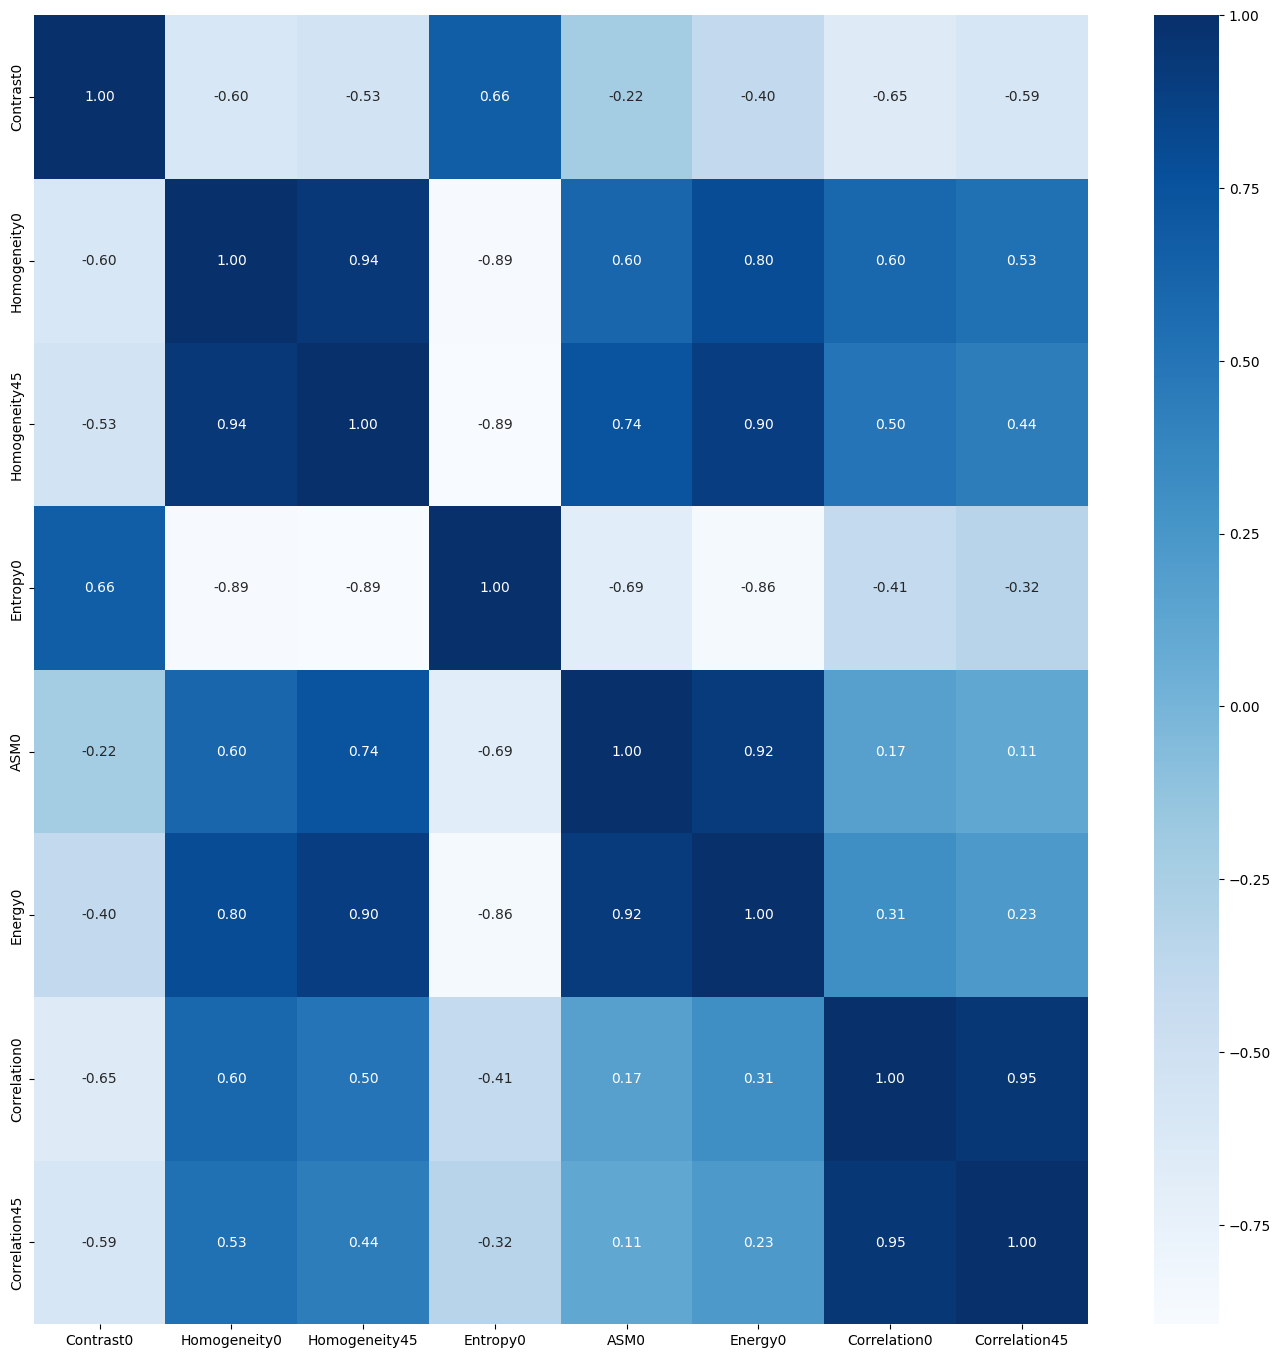

In [36]:
# Menghitung korelasi
correlation = hasilEkstrak.drop(columns=['Label','Filename']).corr()

# Menyaring fitur yang memiliki korelasi absolut lebih dari 0.95 dengan label
threshold = 0.95 # atur threshold ini untuk menentukan seberapa besar korelasi yang ingin disaring
selectionFeature = []
columns = np.full((correlation.shape[0],), True, dtype=bool)
for i in range(correlation.shape[0]):
	for j in range(i+1, correlation.shape[0]):
		if correlation.iloc[i,j] >= threshold:
			if columns[j]:
				columns[j] = False
select = hasilEkstrak.drop(columns=['Label','Filename']).columns[columns]
x_new = hasilEkstrak[select]
x_new
y = hasilEkstrak['Label']
plt.figure(figsize=(17,17))
sns.heatmap(x_new.corr(), annot=True, cmap='Blues', fmt=".2f")

## Splitting Data

In [37]:
# ubah bagian test_size sesuai kebutuhan
# 0.3 = 30% data untuk testing (train/test 70/30)
# 0.2 = 20% data untuk testing (train/test 80/20)
X_train, X_test, y_train, y_test = train_test_split(x_new, y, test_size=0.3, random_state=42)
print(X_train.shape)
print(X_test.shape)

(280, 8)
(120, 8)


## Feature Normalization

berikut metode normalisasi yang bisa digunakan:
- Min-Max Scaling
- Standardization (Z-score)
- Robust Scaling
- MaxAbsScaler
- dll

berikut contoh menggunakan Standardization (Z-score):

In [38]:
# normalisasi mean std
X_test = (X_test - X_train.mean()) / X_train.std()
X_train = (X_train - X_train.mean()) / X_train.std()

## Modeling

### Define Model

In [39]:
def generateClassificationReport(y_true, y_pred):
	print(classification_report(y_true, y_pred))
	print(confusion_matrix(y_true, y_pred))
	print('Accuracy:', accuracy_score(y_true, y_pred))

# Define classifiers
rf = RandomForestClassifier(n_estimators=5, random_state=42)
svm = SVC(kernel='rbf', random_state=42)
knn = KNeighborsClassifier(n_neighbors=5)

### Train Random Forest Classifier

In [40]:
# Train Random Forest Classifier
rf.fit(X_train, y_train)

# Make predictions and evaluate the model with the training set
print("------Training Set------")
y_pred = rf.predict(X_train)
generateClassificationReport( y_train, y_pred)

# Make predictions and evaluate the model with the testing set
print("\n------Testing Set------")
y_pred = rf.predict(X_test)
generateClassificationReport( y_test, y_pred)

------Training Set------
              precision    recall  f1-score   support

       Clean       0.96      0.98      0.97       133
       Dirty       0.99      0.97      0.98       147

    accuracy                           0.97       280
   macro avg       0.97      0.98      0.97       280
weighted avg       0.98      0.97      0.98       280

[[131   2]
 [  5 142]]
Accuracy: 0.975

------Testing Set------
              precision    recall  f1-score   support

       Clean       0.93      0.81      0.86        67
       Dirty       0.79      0.92      0.85        53

    accuracy                           0.86       120
   macro avg       0.86      0.87      0.86       120
weighted avg       0.87      0.86      0.86       120

[[54 13]
 [ 4 49]]
Accuracy: 0.8583333333333333


### Train SVM Classifier

In [41]:
# Train SVM Classifier
svm.fit(X_train, y_train)

# Make predictions and evaluate the model with the training set
print("\n------Training Set------")
y_pred = svm.predict(X_train)
generateClassificationReport( y_train, y_pred)

# Make predictions and evaluate the model with the testing set
print("\n------Testing Set------")
y_pred = svm.predict(X_test)
generateClassificationReport( y_test, y_pred)


------Training Set------
              precision    recall  f1-score   support

       Clean       0.78      0.74      0.76       133
       Dirty       0.77      0.81      0.79       147

    accuracy                           0.78       280
   macro avg       0.78      0.77      0.77       280
weighted avg       0.78      0.78      0.77       280

[[ 98  35]
 [ 28 119]]
Accuracy: 0.775

------Testing Set------
              precision    recall  f1-score   support

       Clean       0.83      0.72      0.77        67
       Dirty       0.69      0.81      0.75        53

    accuracy                           0.76       120
   macro avg       0.76      0.76      0.76       120
weighted avg       0.77      0.76      0.76       120

[[48 19]
 [10 43]]
Accuracy: 0.7583333333333333


### Train KNN Classifier

In [42]:
# Train KNN Classifier
knn.fit(X_train, y_train)

# Make predictions and evaluate the model with the training set
print("\n------Training Set------")
y_pred = knn.predict(X_train)
generateClassificationReport( y_train, y_pred)

# Make predictions and evaluate the model with the testing set
print("\n------Testing Set------")
y_pred = knn.predict(X_test)
generateClassificationReport( y_test, y_pred)



------Training Set------
              precision    recall  f1-score   support

       Clean       0.83      0.86      0.84       133
       Dirty       0.87      0.84      0.85       147

    accuracy                           0.85       280
   macro avg       0.85      0.85      0.85       280
weighted avg       0.85      0.85      0.85       280

[[114  19]
 [ 24 123]]
Accuracy: 0.8464285714285714

------Testing Set------
              precision    recall  f1-score   support

       Clean       0.85      0.67      0.75        67
       Dirty       0.67      0.85      0.75        53

    accuracy                           0.75       120
   macro avg       0.76      0.76      0.75       120
weighted avg       0.77      0.75      0.75       120

[[45 22]
 [ 8 45]]
Accuracy: 0.75


## Evaluation With Confusion Matrix

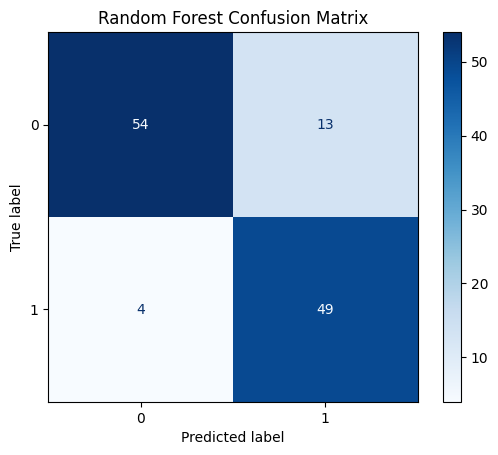

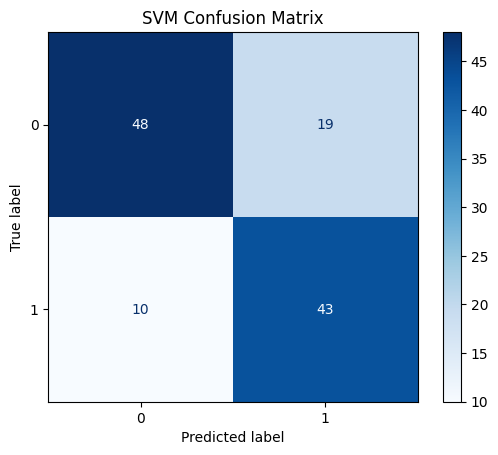

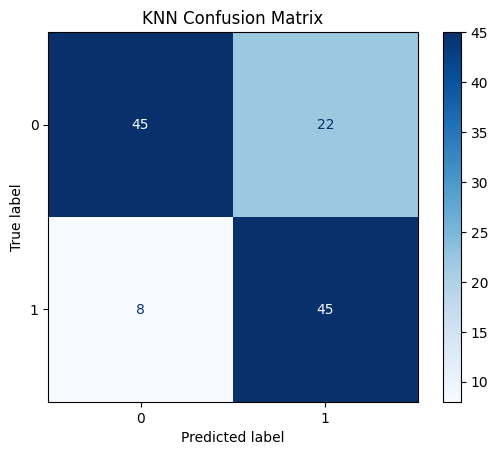

In [43]:
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(title)
    plt.show()

# Plot confusion matrix for Random Forest
plot_confusion_matrix(y_test, rf.predict(X_test), "Random Forest Confusion Matrix")
# Plot confusion matrix for SVM
plot_confusion_matrix(y_test, svm.predict(X_test), "SVM Confusion Matrix")
# Plot confusion matrix for KNN
plot_confusion_matrix(y_test, knn.predict(X_test), "KNN Confusion Matrix")